# D1: KAGGLE-HOUSE PRICES 


Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Team: Sandra Lannes, Sarah Lannes, Danver Hans Värv

Project repository: https://github.com/sandralannes/D1_KaggleHousePrices

The main goal for this project is just to learn and consolidate our knowledge on data science. In addition, with this project we will practice creative feature engineering skills and advanced regression techniques like random forest and gradient boosting. Goal is to predict house prices as accurately as possible using everything we have learned so far. 

'Kernel->Restart and run all' should run through the notebook, if all the needed dependencies are installed.

Importing dependencies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
import sys
from scipy.stats import norm, skew
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import Image

Reading in the data from .csv files. Looking at columns and the values from dataset.describe() of each column.

In [2]:
train = pd.read_csv('train.csv')
train_size = train.shape[0]
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Printing out the names of the columns and also number of columns and rows to have an overview of what we have before starting the actual project.

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.shape

(1460, 81)

Removing id field from both datasets because it doesn't give any valuable information for the predictions

In [6]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

Dropping all columns that have more than 70% NaN values, because they are not useful for our predictions.

In [7]:
train = train.dropna(thresh=0.70*len(train), axis=1)
test = test.dropna(thresh=0.70*len(test), axis=1)
train.shape

(1460, 75)

In [8]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()
null = pd.concat([training_null, testing_null], axis=1, keys=["train", "test"])
null

,train,test
MSSubClass,0,0.0
MSZoning,0,4.0
LotFrontage,259,227.0
LotArea,0,0.0
Street,0,0.0
...,...,...
MoSold,0,0.0
YrSold,0,0.0
SaleType,0,1.0
SaleCondition,0,0.0


Finding columns, that have a meaningful NaN and filling them with 'none'

In [9]:
no = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond","MasVnrType"]

In [10]:
for i in no:
    train[i].fillna("none", inplace=True)
    test[i].fillna("none", inplace=True)

Dealing with missing values.

In [11]:
many_nulls = null[null.sum(axis=1) > 200]  #a lot of missing values
few_nulls = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #few missing values
many_nulls

,train,test
LotFrontage,259,227.0


In [12]:
few_nulls

,train,test
MSZoning,0,4.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtQual,37,44.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinType1,37,42.0


In [13]:
train.drop("LotFrontage", axis=1, inplace=True)
test.drop("LotFrontage", axis=1, inplace=True)


# lets find numeric and categorical data types for train and test dataset
types_train = train.dtypes 
numeric_train = types_train[(types_train == int) | (types_train == float)] 
categorical_train = types_train[types_train == object] 

types_test = test.dtypes
numeric_test = types_test[(types_test == int) | (types_test == float)]
categorical_test = types_test[types_test == object]

num_values_train = list(numeric_train.index)
num_values_test = list(numeric_test.index)
num_to_fill = num_values_train+num_values_test

cat_values_train = list(categorical_train.index)
cat_values_test = list(categorical_test.index)

print(num_to_fill)

['MasVnrArea', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [14]:
# Replacing numeric nan features with mean
for i in num_to_fill:
    train[i].fillna(train[i].mean(), inplace=True)
    test[i].fillna(test[i].mean(), inplace=True)

In [15]:
print(train.shape, test.shape)

(1460, 74) (1459, 73)


In [16]:
# Replacing categorical nan features
catategoricals = []
for i in cat_values_train:
    if i in list(few_nulls.index):
        catategoricals.append(i)
        
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)

most_common_values = []

for i in catategoricals:
    most_common_values.append(most_common_term(train[i]))

def clean(df):
    k = 0
    for i in catategoricals:  
        df[i].fillna(most_common_values[k], inplace=True)
        k += 1
    
clean(train)
clean(test)


In [17]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["train", "test"])
null[null.sum(axis=1) > 0]
# now we dont have any na value

,train,test


Making a distribution plot for sale prices to see what we are dealing with and what to expect.

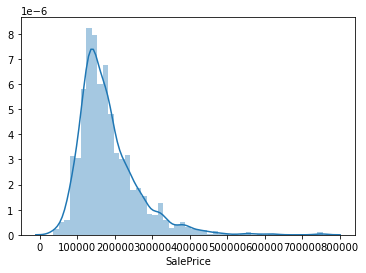

In [18]:
sns.distplot(train['SalePrice'])

Finding attributes absolute correlations with sale price and showing top 10 that affect sale price the most.

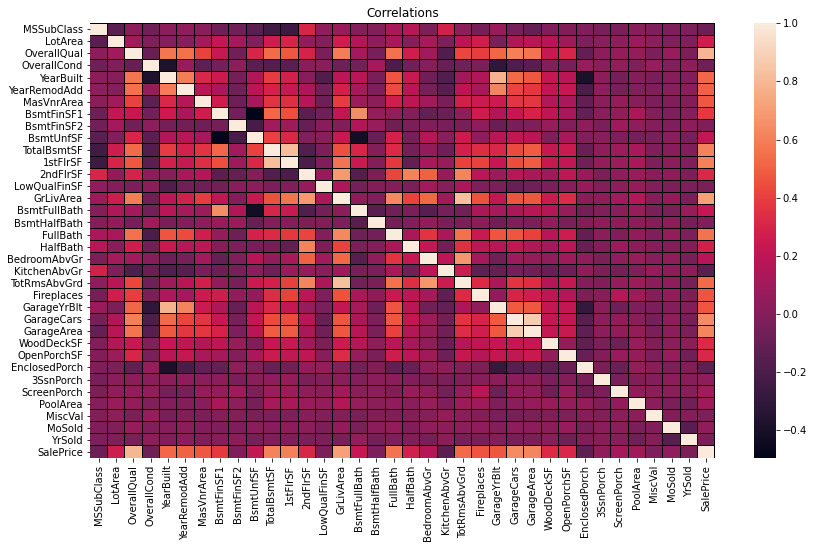

In [19]:
corr = train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,linewidths=0.01,linecolor='k')
plt.title('Correlations')
plt.show()

In [20]:
correlations = corr.abs()['SalePrice']
correlations = correlations.drop(labels=['SalePrice'])
correlations = correlations.sort_values(ascending=False).head(10)
correlations

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

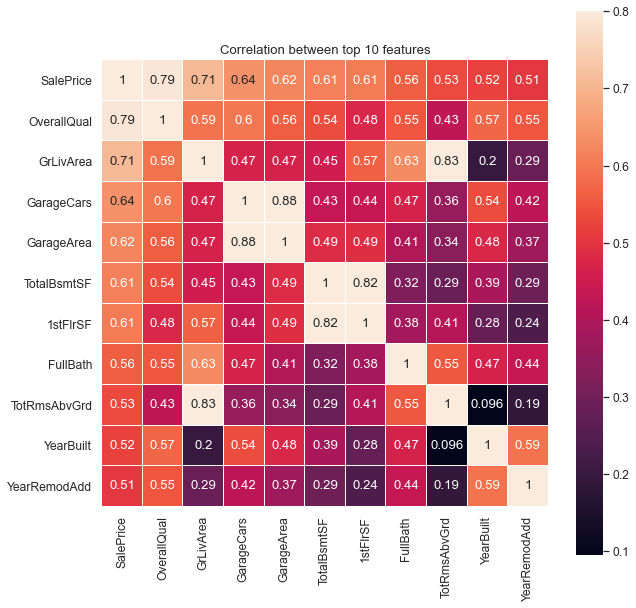

In [21]:
corrMatrix=train[["SalePrice", "OverallQual","GrLivArea","GarageCars",
                  "GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True)
plt.title('Correlation between top 10 features');

Making scatter plots for the top 10 absolute correlations.

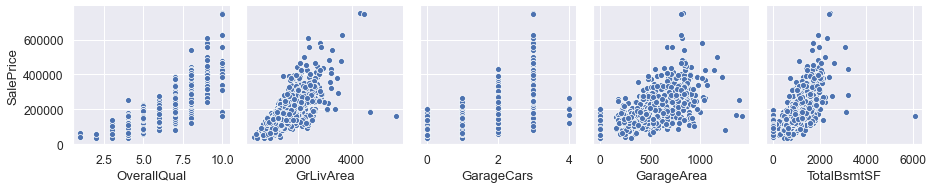

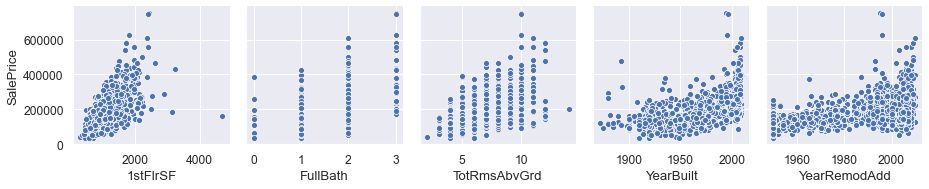

In [22]:
sns.pairplot(train,x_vars=['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF'],y_vars=["SalePrice"],kind='scatter')
sns.pairplot(train,x_vars=['1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd'],y_vars=["SalePrice"],kind='scatter')


We have some outliers, lets deal with them. For that we are looking at 5 columns: 'GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtFinSF1', and removing rows that contain upper outliers (rows where the values are bit too big). We are also tracking how many rows were lost and looking the scattered pairplots before and after removing the outliers.

(1460, 74)
(1448, 74)


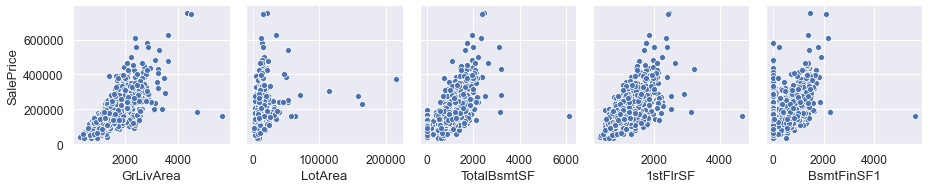

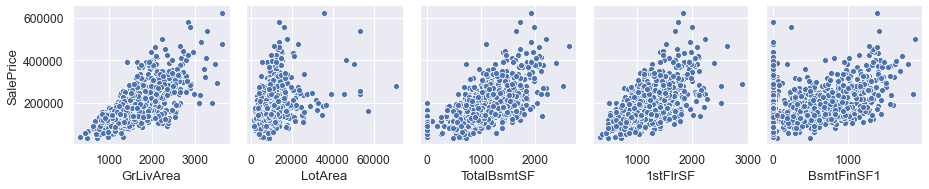

In [23]:
sns.pairplot(train,x_vars=['GrLivArea','LotArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1'],y_vars=["SalePrice"],kind='scatter')
print(train.shape)
train = train[train['GrLivArea'] < 4004]
train = train[train['LotArea'] < 100000]
train = train[train['TotalBsmtSF'] < 3000]
train = train[train['BsmtFinSF1'] < 2000]

print(train.shape)
sns.pairplot(train,x_vars=['GrLivArea','LotArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1'],y_vars=["SalePrice"],kind='scatter')


In [24]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


One-hot encoding our test and train data to make it even.

In [25]:
df1 = train.copy() 
df1['source'] = 'train'

df2 = test.copy() 
df2['source'] = 'test'

# TODO
data = pd.concat([df1,df2])

#data[data.select_dtypes('object').columns]=data.select_dtypes('object').replace(np.NaN,'NO')

#print(data.columns[data.isna().any()].tolist())    
#imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
#imputer = imputer.fit(data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']])
#data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']] = imputer.transform(data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']])  
    
data_dum = pd.get_dummies(data, columns=data.drop(columns=['source']).select_dtypes('object').columns)
data_dum

train = data_dum.loc[data_dum['source'] == 'train'].drop(columns=['source'])
test = data_dum.loc[data_dum['source'] == 'test'].drop(columns=['source'])


In [26]:
#pd.set_option('display.max_columns', 290)

X_train = train.drop(columns=['SalePrice'])
y_train = train.SalePrice
X_test=test.drop(columns=['SalePrice'])
train.head()

def toCSV(file, y_test):
    probs=pd.DataFrame(y_test)
    # add 13 to get new index, deleted 12 rows before
    probs['Id']= np.arange(len(X_train)+13, len(X_train)+len(y_test)+13)
    probs.columns = ['SalePrice', 'Id']
    probs=probs.reindex(columns=['Id','SalePrice'])
    probs.to_csv(file, index=False)

From here we are done with the data exploration and have replaced all neccessary missing values, one-hot encoded our data and removed the outliers. Now we are starting to train different models. In our report we stated that we are using some of the models that we learned during the "Introduction to Data Science" course and try out some new ones too. 

Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

Trying LinearRegression() (result=RMSE 0.20083), not the goal result we wanted but an OK result for start.

In [27]:
regr = linear_model.LinearRegression().fit(X_train, y_train)
regr_y_pred = regr.predict(X_test)
toCSV("LinearRegression.csv", regr_y_pred)

Trying RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0) (RMSE 0.31636), not the best result.

In [28]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0).fit(X_train, y_train)
y_test3=rf.predict(X_test)
toCSV("RandomForestClasssifier.csv", y_test3)

RandomForestRegressor(bootstrap=True,max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000,random_state=42) (RMSE 0.15432), already so much better.

In [29]:
rg = RandomForestRegressor(bootstrap=True,max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000,random_state=42).fit(X_train, y_train)
y_test1=rg.predict(X_test)
toCSV("RandomForestRegressor.csv", y_test1)

RandomForestClassifier() (RMSE 0.31636) (Same as the other RandomForestClassifier), not good result.

In [30]:
rf1 = RandomForestClassifier().fit(X_train, y_train)
y_test2=rf1.predict(X_test)
toCSV("RandomForestClasssifier1.csv", y_test2)

Tried Lasso()(RMSE 0.31636), not good.

In [31]:
lasso = linear_model.Lasso().fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)
toCSV("lasso.csv",lasso_y_pred)

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223384066858.31522, tolerance: 809253466.763726
  model = cd_fast.enet_coordinate_descent(


Ridge()(RMSE 0.15643) was quite OK, but we can do better. :)

In [32]:
ridge = linear_model.Ridge().fit(X_train, y_train)
y_test = ridge.predict(X_test)
toCSV("proov.csv", y_test)

It might be needed to run 'pip install xgboost' on anaconda prompt to install the library for XGBRegressor.

XGBRegressor(learning_rate=0.01,n_estimators=20000, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7, colsample_bytree=0.7, objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=27,reg_alpha=0.006)(RMSE 0.13498), best result so far.

In [33]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=20000, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7, 
                       colsample_bytree=0.7, objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=27,reg_alpha=0.006)
xgb = xgboost.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
toCSV("xgboost.csv", xgb_pred)

[15:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()(RMSE 0.14547)

In [34]:
xgboost1 = XGBRegressor()
xgb1 = xgboost1.fit(X_train, y_train)
xgb_pred1 = xgb1.predict(X_test)
toCSV("xgboost1.csv", xgb_pred1)

GradientBoostingRegressor()(RMSE 0.14045)

In [35]:
gbr = GradientBoostingRegressor().fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
toCSV("gradientboostreg.csv", gbr_pred)

GradientBoostingRegressor(n_estimators=300,min_samples_split = 4,min_samples_leaf=2)(RMSE 0.13825)

In [36]:
gbr1 = GradientBoostingRegressor(n_estimators=300,
                           min_samples_split = 4,
                           min_samples_leaf=2).fit(X_train, y_train)
gbr_pred1 = gbr1.predict(X_test)
toCSV("gradientboostreg1.csv", gbr_pred1)

After trying out many different models, we see that regressors work better than other models for us, RandomForestRegressor, GradientBoostingRegressor and XGBRegressor have the highest scores so far. Therefore we try to make them better by tuning their parameters.

Tried another GradientBoostingRegressor(n_estimators=1000,min_samples_leaf=2)(RMSE 0.14034), but it didn't turn out as good as last one.

In [37]:
gbr2 = GradientBoostingRegressor(n_estimators=1000,min_samples_leaf=2).fit(X_train, y_train)
gbr_pred2 = gbr2.predict(X_test)
toCSV("gradientboostreg2.csv", gbr_pred2)

Tried another GradientBoostingRegressor(n_estimators=250, min_samples_split = 2,min_samples_leaf=1)(RMSE 0.13680) and it improved.

In [38]:
gbr3 = GradientBoostingRegressor(n_estimators=250, min_samples_split = 2,min_samples_leaf=1).fit(X_train, y_train)
gbr_pred3 = gbr3.predict(X_test)
toCSV("gradientboostreg3.csv", gbr_pred3)

Also tried another XGBRegressor(colsample_bytree= 0.4, n_estimators= 1000,min_child_weight= 3, max_depth= 6,subsample= 0.4,learning_rate= 0.01, gamma = 0,reg_lambda= 0.02)(RMSE 0.12851) and got the best result, we fit into top 28% of all participants(our goal was top 50%).

In [39]:
xgboost2 = XGBRegressor(colsample_bytree= 0.4, n_estimators= 1000,min_child_weight= 3,
                       max_depth= 6,subsample= 0.4,learning_rate= 0.01, gamma = 0,reg_lambda= 0.02)
xgb2 = xgboost2.fit(X_train, y_train)
xgb_pred2 = xgb2.predict(X_test)
toCSV("xgboost2.csv", xgb_pred2)

To conclude our project, we made 16 submissions on Kaggle, we fit into top 28% of all participants, which means that we fulfilled our goal! You can see our submissions from the picture above. In addition, we learned how to predict data, if you need to understand, change, correct and reformat the data by yourself. We used models we had learned from the course and also found out some new models, that worked really well with our dataset. When examining regression, we found out which parameters affect the prices the most in  Ames, Iowa. 

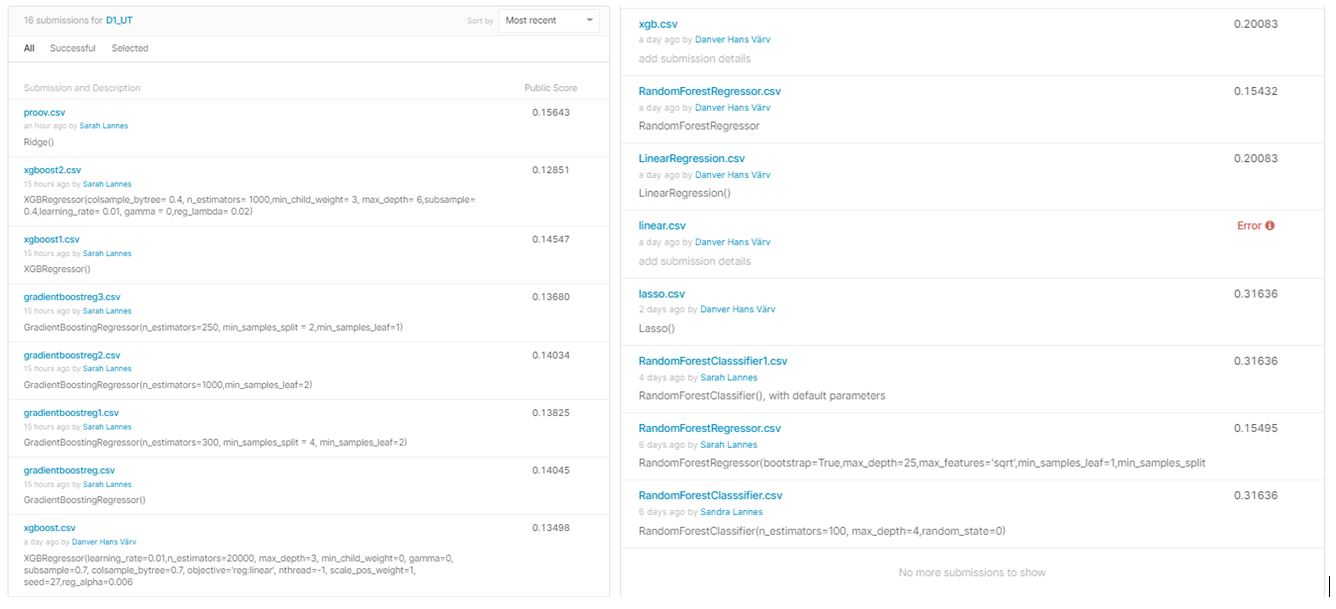

In [40]:
Image(filename='submissions.jpg')